# Analysis of Irish Arts Council Funding, 2003 - 2017  

This notebook aims to analyse the funding awarded by the Arts Council of Ireland 
to artists working in a range of artforms over the period 2003 to 2017.

In [1]:
# Import libraries. Pandas requires xlrd to be installed, to handle older 
# Excel files. 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Source  
**Arts Council Grants to Artists by Artform, 2003-2010, 2016, 2017.**  
- The Arts Council does not publish historical funding data but the above breakdowns are available from the [Central Statistics Office](www.cso.ie), via CSO publications on ["Women and Men in Ireland"](https://www.cso.ie/en/statistics/womenandmeninireland/).  
(2013 publication does not contain any Arts Council data.)  
- **Note: the date in the URL refers to the date of publication, not the period of the data.**
- These tables do not represent all grants made by the Arts Council, but only grants 
made to individual artists (via schemes such as Cnuas, Artists’ Bursaries, Artists’ Awards.)

## Reading in data

In [2]:
# Dict to hold URLs of spreadsheet data
URL = {}

URL[2003] = "https://www.cso.ie/en/media/csoie/releasespublications/documents/otherreleases/2004/entiretablesandgraphs.xls"
URL[2004] = "https://www.cso.ie/en/media/csoie/releasespublications/Women_and_Men_in_Ireland_2005_-_Tables_and_Graphs.xls"
URL[2005] = "https://www.cso.ie/en/media/csoie/releasespublications/Women_and_Men_in_Ireland_2006_-_Tables_and_Graphs.xls"
URL[2006] = "https://www.cso.ie/en/media/csoie/releasespublications/documents/otherreleases/2007/womenandmen2007.xls"
URL[2007] = "https://www.cso.ie/en/media/csoie/releasespublications/documents/otherreleases/2008/womenandmen2008.xls"
URL[2008] = "https://www.cso.ie/en/media/csoie/releasespublications/documents/otherreleases/2009/womenandmen2009.xls"
URL[2009] = "https://www.cso.ie/en/media/csoie/releasespublications/documents/otherreleases/2010/womenandmen2010.xls"
URL[2010] = "https://www.cso.ie/en/media/csoie/releasespublications/documents/otherreleases/2011/womenandmen2011.xls"
URL[2016] = "https://www.cso.ie/en/media/csoie/releasespublications/documents/ep/womenandmeninireland/2016/socialcohesionandlifestyles/P-WAMII2016TBL3.17.xlsx"
URL[2017] = "https://www.cso.ie/en/media/csoie/releasespublications/documents/ep/womenandmeninireland/2019/genderequality/P-WAMII2019TBL4.9.xlsx"


In [3]:
# Set column names and data types for imported data
column_names = ["artform", "num_male", "num_female", "avg_grant_male", "avg_grant_female"]
column_dtypes = {0:str, 1:int, 2:int, 3:float, 4:float} 

# create dict to store DataFrames indexed by year
df_individual = {}

# Try Excel import using pandas.read_excel()
# https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
# https://www.geeksforgeeks.org/python/working-with-excel-files-using-pandas/

# Read in to DataFrames from data URLs. Each URL source requires different 
# parameters, determined after visually inspecting the source files.
df_individual[2003] = pd.read_excel(URL[2003], sheet_name="Table 4.11", header=[3], usecols="A:E", nrows=10, names=column_names, dtype=column_dtypes)
df_individual[2004] = pd.read_excel(URL[2004], sheet_name="Table 4.13", header=[2], usecols="A:E", nrows=11, names=column_names, dtype=column_dtypes)
df_individual[2005] = pd.read_excel(URL[2005], sheet_name="Table 4.13", header=[3], usecols="A:E", nrows=13, names=column_names, dtype=column_dtypes)
df_individual[2006] = pd.read_excel(URL[2006], sheet_name="Table 4.12", header=[3], usecols="A:E", nrows=13, names=column_names, dtype=column_dtypes)
df_individual[2007] = pd.read_excel(URL[2007], sheet_name="Table 4.12", header=[3], usecols="A:E", nrows=12, names=column_names, dtype=column_dtypes)
df_individual[2008] = pd.read_excel(URL[2008], sheet_name="Table 3.21", header=[3], usecols="A:E", nrows=12, names=column_names, dtype=column_dtypes)
df_individual[2009] = pd.read_excel(URL[2009], sheet_name="Table 3.21", header=[3], usecols="A:E", nrows=10, names=column_names, dtype=column_dtypes)
df_individual[2010] = pd.read_excel(URL[2010], sheet_name="Table 3.21", header=[3], usecols="A:E", nrows=11, names=column_names, dtype=column_dtypes)
df_individual[2016] = pd.read_excel(URL[2016], header=[2], usecols="A:E", nrows=13, names=column_names, dtype=column_dtypes)
df_individual[2017] = pd.read_excel(URL[2017], header=[2], usecols="A:E", nrows=14, names=column_names, dtype=column_dtypes)


In [4]:
# Create list of years for which I have a data source
years_available = list(range(2003,2011)) + [2016, 2017]

# Insert the relevant year as a column in each separate DataFrame
for year in years_available:
    df_individual[year].insert(1, "year", year)

# Look at first result
print(df_individual[years_available[0]].dtypes)


artform              object
year                  int64
num_male              int64
num_female            int64
avg_grant_male      float64
avg_grant_female    float64
dtype: object


In [5]:
# Create empty DataFrame to hold concatenated data
df_all_years = pd.DataFrame()

# Append each year's data to the main DataFrame
for year in years_available:
#    print(df_individual[year].shape)
    df_all_years = pd.concat([df_all_years, df_individual[year]])

# Check stats on the new main DataFrame
df_all_years.describe

<bound method NDFrame.describe of                                 artform  year  num_male  num_female  \
0                        Community arts  2003         0           3   
1                                 Dance  2003         6          19   
2                                 Drama  2003        40          33   
3                                 Film   2003        41          30   
4                            Literature  2003        90          40   
..                                  ...   ...       ...         ...   
9                           Street Arts  2017         4           3   
10                              Theatre  2017        32          47   
11                     Traditional Arts  2017        20          10   
12                          Visual Arts  2017        85         124   
13  Young people, children and educaton  2017         7          26   

    avg_grant_male  avg_grant_female  
0              0.0            1250.0  
1            554.0            3653.

In [6]:
# Export new main DataFrame to CSV for examination
df_all_years.to_csv("df_all_years.csv")

# Make copy of raw DataFrame, pre-cleaning, for safety
df = df_all_years.copy()

## Cleaning Data

In [7]:
# Make copy of raw DataFrame, pre-cleaning, for safety
df = df_all_years.copy()

# List all the artforms in the raw DataFrame
list_artforms = list(df["artform"].sort_values().unique())

# Show the list of artforms
print(len(list_artforms), "unique entries in Artform column")
list_artforms

31 unique entries in Artform column


['Architecture',
 'Arts Participation',
 'Arts participation',
 'Choreography',
 'Circus',
 'Circus/Spectacle',
 'Community Arts',
 'Community arts',
 'Dance',
 'Drama',
 'Education',
 'Film',
 'Film ',
 'Film/Film & Audio Visual',
 'Literature',
 'Multi-Disciplinary Arts',
 'Multidisciplinary art',
 'Multidisciplinary arts',
 'Music',
 'Opera',
 'Other',
 'Participation',
 'Street Arts',
 'Summary',
 'Theatre',
 'Traditional Arts',
 'Visual Arts',
 'Visual arts',
 'Young people and children',
 'Young people, children and education',
 'Young people, children and educaton']

In [8]:
# Change all column names to lowercase, remove whitespace
df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
    )

# Change all artform names to lowercase, remove whitespace
df["artform"] = (
        df_all_years["artform"]
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("-", "")
        .str.replace(",", "")
    )

# List all the artforms in the raw DataFrame
list_artforms = list(df["artform"].sort_values().unique())

# Show the list of artforms
print(len(list_artforms), "unique entries in Artform column")
list_artforms

26 unique entries in Artform column


['architecture',
 'arts_participation',
 'choreography',
 'circus',
 'circus/spectacle',
 'community_arts',
 'dance',
 'drama',
 'education',
 'film',
 'film/film_&_audio_visual',
 'literature',
 'multidisciplinary_art',
 'multidisciplinary_arts',
 'music',
 'opera',
 'other',
 'participation',
 'street_arts',
 'summary',
 'theatre',
 'traditional_arts',
 'visual_arts',
 'young_people_and_children',
 'young_people_children_and_education',
 'young_people_children_and_educaton']

There are many inconsistently categorised and formatted artforms in this list.

In [9]:
# Create a dict that specify how I want to replace various entries in 
# the artform column
artform_map = {

    "circus": "circus_street",
    "circus/spectacle": "circus_street",
    "street_arts": "circus_street",

    "multidisciplinary_arts": "multidisciplinary_arts",
    "multidisciplinary_art": "multidisciplinary_arts",

    "choreography": "dance",

    "drama": "theatre",

    "film": "film_AV",
    "film/film_&_audio_visual": "film_AV",

    "arts_participation": "arts_participation",
    "participation": "arts_participation",

    "education": "young_people_children_education",
    "young_people_and_children": "young_people_children_education",
    "young_people_children_and_educaton": "young_people_children_education",
    "young_people_children_and_education": "young_people_children_education"
}

In [10]:
# Use the map to replace values in the artform column
df["artform"] = df["artform"].replace(artform_map)

# List all the unique artforms in the raw DataFrame
list_artforms = list(df["artform"].sort_values().unique())

# Show the list of artforms
print(len(list_artforms), "unique entries in Artform column")
list_artforms

16 unique entries in Artform column


['architecture',
 'arts_participation',
 'circus_street',
 'community_arts',
 'dance',
 'film_AV',
 'literature',
 'multidisciplinary_arts',
 'music',
 'opera',
 'other',
 'summary',
 'theatre',
 'traditional_arts',
 'visual_arts',
 'young_people_children_education']

In [11]:
# Check for null values
print(df.isnull().sum())

# Drop the entry where the artform is "summary" (error in raw data?)
df = df[df["artform"] != "summary"]

# List all the artforms in the raw DataFrame
list_artforms = list(df["artform"].sort_values().unique())

# Show the list of artforms
print(len(list_artforms), "unique entries in Artform column")
list_artforms

# Copy the cleaned DataFrame
df_cleaned = df.copy()

artform             0
year                0
num_male            0
num_female          0
avg_grant_male      0
avg_grant_female    0
dtype: int64
15 unique entries in Artform column


## Deriving data

In [12]:
# Start with the cleaned DataFrame
df = df_cleaned.copy()

# Calculate the total grant awarded to each artform, each year.
df["total_grant_male"] = (df["num_male"] * df["avg_grant_male"])

df["total_grant_female"] = (df["num_female"] * df["avg_grant_female"])

df["total_grant"] = (df["total_grant_male"] + df["total_grant_female"])


In [13]:
# Calculate the total number of recipients each year
df["num_recipients"] = df["num_male"] + df["num_female"]

In [18]:
# Calculate the average grant per capita per artform per year
df["avg_grant_perperson"] = df["total_grant"] / df["num_recipients"]

### Aggregate data by year

In [20]:
# Create a DataFrame that aggregates data by year
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
# https://www.geeksforgeeks.org/pandas/python-pandas-dataframe-groupby/

df_year = df.drop(columns=["artform","avg_grant_male","avg_grant_female"]).groupby("year").sum()

print(df_year)

      num_male  num_female  total_grant_male  total_grant_female  total_grant  \
year                                                                            
2003       390         271        1595899.00          1004362.00   2600261.00   
2004       319         248        1622431.00           912601.00   2535032.00   
2005       458         379        2467014.00          1547625.00   4014639.00   
2006       506         383        3358462.00          2190479.00   5548941.00   
2007       548         454        4277546.00          3180160.00   7457706.00   
2008       486         405        3791579.00          2620656.00   6412235.00   
2009       345         312        3234281.87          2438530.03   5672811.90   
2010       348         332        3370017.58          2831881.00   6201898.58   
2016       273         291        3399172.00          3582262.00   6981434.00   
2017       298         380        3969909.00          4125727.00   8095636.00   

      num_recipients  avg_g

## Sample plots

''

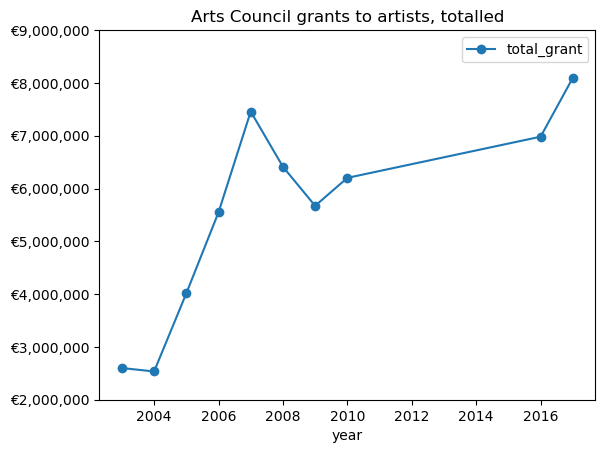

In [16]:
# Plot annual total funding result
df_year["total_grant"].plot(marker="o", legend=True)
plt.title("Arts Council grants to artists, totalled")

# grab ytick locations and reformat to make ytick labels
# (Code adapted from https://queirozf.com/entries/matplotlib-examples-number-formatting-for-axes-labels)
ylocs, ylabels = plt.yticks()
ylabels_formatted = ["€{:,.0f}".format(x) for x in ylocs]
plt.yticks(ylocs, ylabels_formatted)

;

''

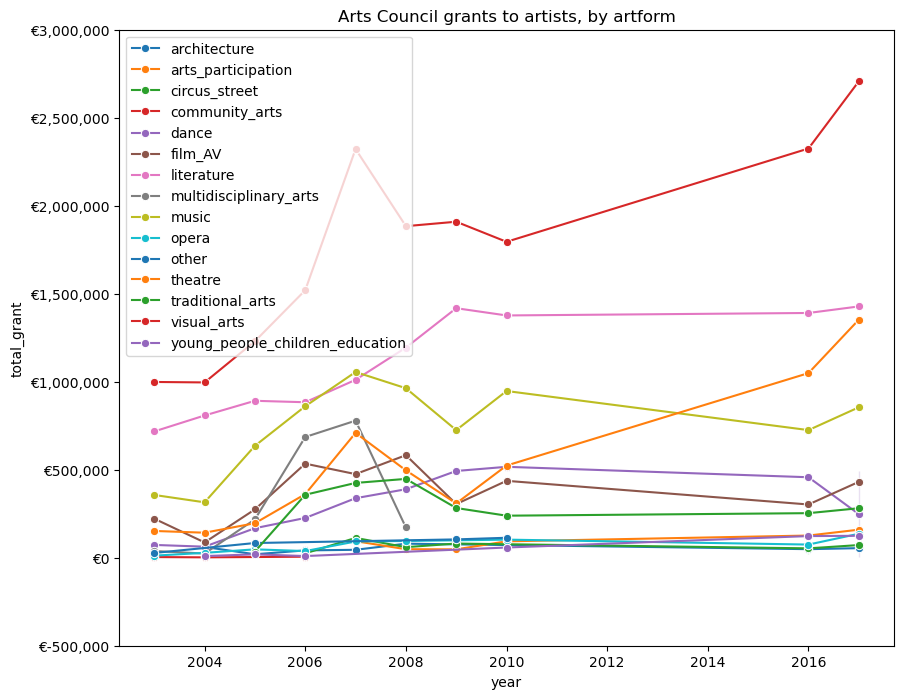

In [ ]:
# Plot the grants awarded by artform.
plt.figure(figsize=(10,8))

for artform in list_artforms:
    sns.lineplot(df[df["artform"]== artform],
                x="year", y="total_grant", marker="o",
            label = artform)

plt.title("Arts Council grants to artists, by artform")

# grab ytick locations and reformat to make ytick labels
ylocs, ylabels = plt.yticks()
ylabels_formatted = ["€{:,.0f}".format(x) for x in ylocs]
plt.yticks(ylocs, ylabels_formatted)
;


## To Do:  
- clean data, especially artform categorisation
- contact Arts Council re. data error 2017? missing year?
- derive more data e.g per-capita grants, gender gap
- look at comparative data sources - Eurostat? Arts Council annual grant figures?